# PRESENTATION DU PROJET : REGRESSION HOUSE SALES


## Contexte 

Perform a first analysis of the dataset, with everything you know (describe, info, quantile, etc...), and a graphical analysis (especially with some boxplots, pairplots and correlation heatmap)

Perform a variety of linear regressions with different inputs. It's up to you to find the most relevant X variables. The target (y) will be the price column. Remember to train-test split your dataset to get a relevant score, and print your test-set R2-score. Compare it with Train score to avoid overfitting.

The last 4 rows don't have price. You'll have to predict prices and print your prediction. Of course, you should make some charts to explain it : you're a Data Analyst!


## Détail des colonnes

The dataset contains many columns.   Here are their business meanings:

**id Unique** : ID for each home sold   
**date** : Date of the home sale   
**price** : The price of each home sold   
**bedrooms** : Number of bedrooms  
**bathrooms** : Number of bathrooms, where .5 accounts for a room with a toilet but no shower  
**sqft_living** : Square footage of the apartments interior living  
**spacesqft_lot** : Square footage of the land space  
**floors** : Number of floors  
**waterfront** : A dummy variable for whether the apartment was overlooking the waterfront or not    
**view** : An index from 0 to 4 of how good the view of the property was  
**condition** : An index from 1 to 5 on the condition of the apartment  
**grade** : An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13have a high quality level of construction and design  
**sqft_above** : The square footage of the interior housing space that is above ground level  
**sqft_basement** : The square footage of the interior housing space that is below ground level  
**yr_built** : The year the house was initially built  
**yr_renovated-** : The year of the house’s last renovation  
zipcode** : What zip code area the house is in  
**lat** : Latitude  
**long** : Longitude  
**sqft_living15** : The square footage of interior housing living space for the nearest 15 neighbors  
**sqft_lot15-** : The square footage of the land lots of the nearest 15 neighbors

# IMPORTER TOUTES LES LIBRAIRIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import altair as alt
from vega_datasets import data

import datetime as dt 
from datetime import datetime



# CHARGER LE FICHIER DE DONNEES 


In [2]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv"
df = pd.read_csv(link)

# INFOS GENERALES

In [3]:
df.info()
# Il y a en effet des lignes manquantes sur la colonne 'price'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21613, 21)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.160900e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401174e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671546e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016826,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016826,1.000000,0.308330,0.525168,0.702040,0.089639,0.256894,0.266367,0.397280,0.036314,0.667444,0.605574,0.323782,0.054123,0.126420,-0.053150,0.307012,0.021601,0.585372,0.082420
bedrooms,0.001286,0.308330,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525168,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702040,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089639,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256894,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266367,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397280,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036314,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


# 1er CALCULS

In [8]:
# Création d'une colonne qui fusionne la latitude et la longitude 
df["lat_long"] = df[['lat','long']].apply(lambda x: ', '.join(x.astype(str)),axis=1)

In [9]:
# Création d'une fonction qui permet de convertir les square footage en m2 

def convert_m2(x) :
    x= x* 0.092903
    return x    

In [10]:
# Création d'une colonne prix moyen au m2
df["mean_m2"] = (df["price"]/convert_m2(df["sqft_living"]))

In [11]:
print( "Le prix moyen au m2 de surface habitable =",round(df["mean_m2"].mean(),2))

Le prix moyen au m2 de surface habitable = 2843.32


In [12]:
# Calcul les sum de ventes par localisations
df_pivot_table = df.pivot_table( index = "zipcode", values ="price", aggfunc = "sum").sort_values("price", ascending = False)

In [13]:
# Top 10 des localisation avec le plus gros chiffre de vente (postcode)
df_pivot_table_1 = df_pivot_table.iloc[0:10]
df_pivot_table_1
# C'est dans le 98004 que le chiffre de vente est le plus élevé = 429828885.0 suivi de près par le 98006

,price
zipcode,
98004,429828885.0
98006,428123020.0
98052,370362856.0
98115,361402019.0
98103,352121365.0
98033,347206834.0
98040,336772866.0
98117,318967639.0
98074,302352147.0


In [14]:
# Change the DATE column to a date format
df['date'] = pd.to_datetime(df['date'])

# Création d'une colonne YEAR
df['YEAR'] = df['date'].dt.year

# Création d'une colonne MOIS
df['MONTH'] = df['date'].dt.month

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_long,mean_m2,YEAR,MONTH
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,"47.5112, -122.257",2024.163347,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,"47.721, -122.319",2253.302061,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,"47.7379, -122.233",2516.239882,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,"47.5208, -122.393",3317.043210,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,"47.6168, -122.045",3267.617069,2015,2


In [16]:
# Créer un dt qui regroupe l'ensemble la sommes des ventes par mois
# df_sales_groupby_year = df.groupby(['year']).sort_values(ascending = False)
df_sales_groupby_year = df.pivot_table( index = "MONTH", values ="price", columns = "YEAR", aggfunc = "sum") 
df_sales_groupby_year

YEAR,2014,2015
MONTH,,
1,NaN,5.139017e+08
2,NaN,6.344142e+08
3,NaN,1.019957e+09
4,NaN,1.253460e+09
5,9.690059e+08,3.605499e+08
6,1.216043e+09,NaN
7,1.204528e+09,NaN
8,1.040704e+09,NaN
9,9.388963e+08,NaN


# 1ère VISUALISATIONS

## Corrélation : Pairplot avec seaborn

In [ ]:
# Sur tout le DF
sns.pairplot(df, hue = "YEAR")  

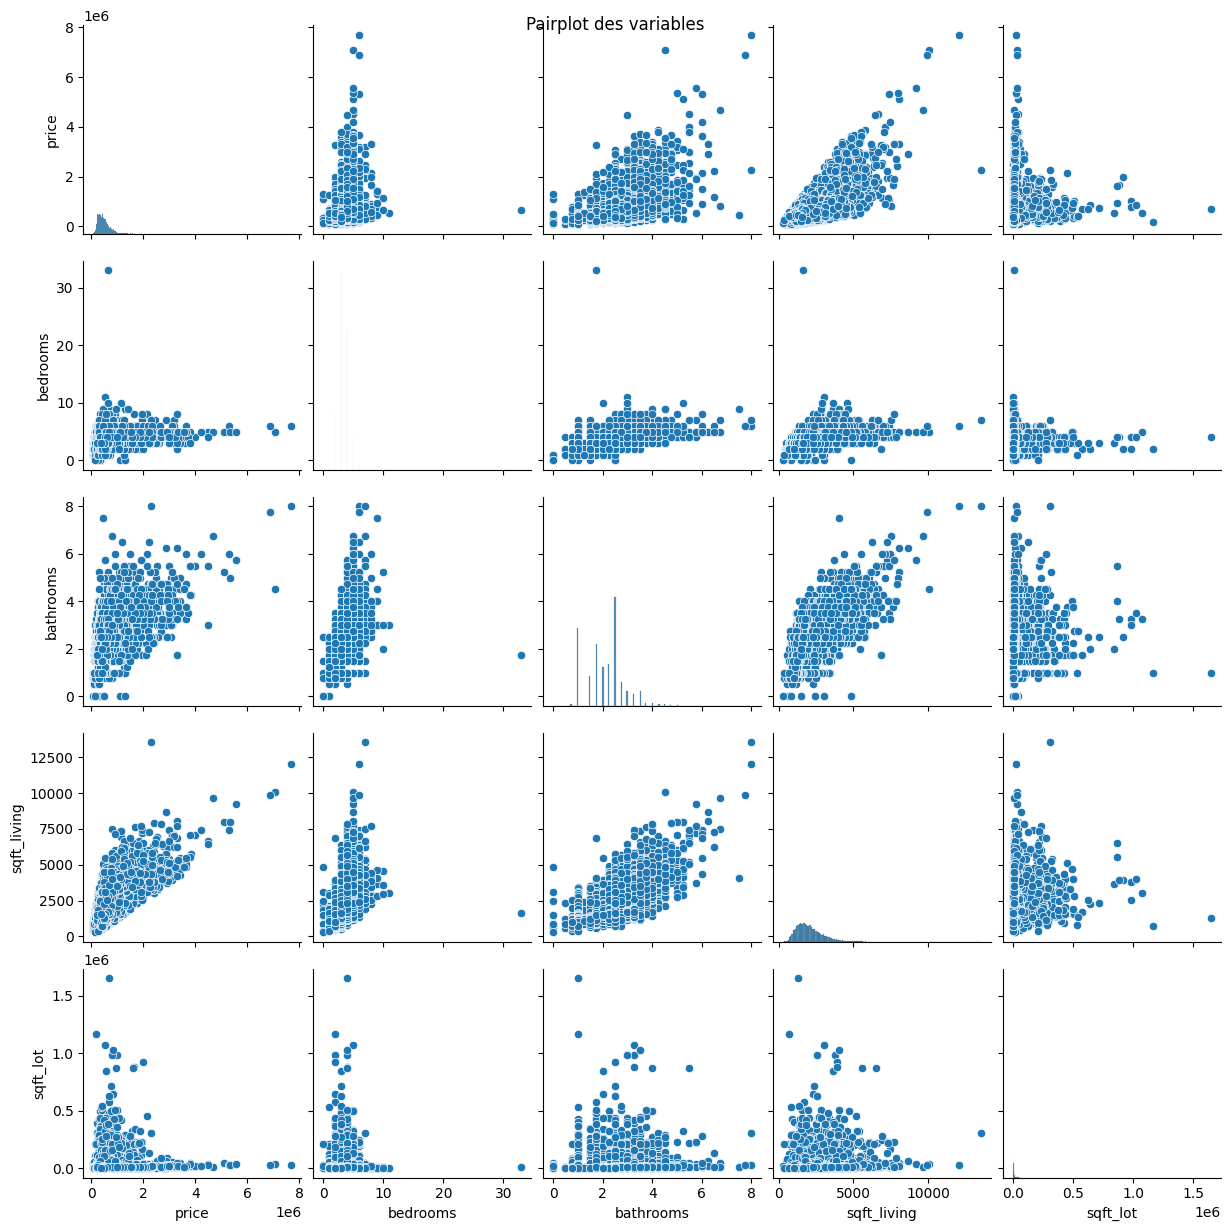

In [ ]:
# SUR LES VARIABLES SUIVANTES UNIQUEMENT : 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.suptitle('Pairplot des variables')
plt.show()

## Corrélation : Pairplot avec plotly

In [ ]:
fig1 = px.scatter_matrix (df,
                        dimensions=["price", "bathrooms", "sqft_living", "sqft_lot", "yr_built", "floors", "waterfront", "view", "sqft_living15", 'condition'],
                        color="grade",
                        color_continuous_scale = 'turbo'
                        )
fig1.update_layout(
    title='Pair Plot',
    dragmode='select',
    width=1500,
    height=800,
    hovermode='closest',
)
fig1.show()

## Heatmap de corrélation

<ipython-input-20-f1c56416b632>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: title={'center': 'Heatmap de corrélation'}>

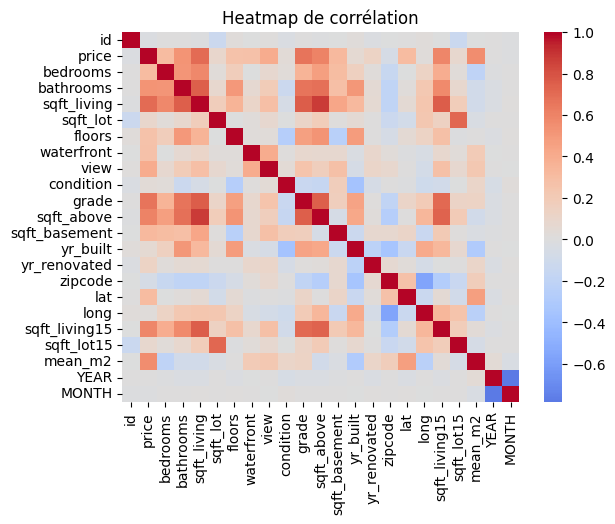

In [ ]:
fig2 = sns.heatmap(df.corr(),cmap="coolwarm", annot=False, center = 0)
sns.set(rc = {'figure.figsize':(8,6)})
plt.title("Heatmap de corrélation")
fig2

**Commentaire**


## Répartition des prix en fonction de la surface d'habitation

In [ ]:
#fig3 = px.scatter(df, x = 'sqft_living', y = 'price', color='bathrooms', trendline="ols",trendline_scope="overall", trendline_color_override="Red")
fig3 = px.scatter(df, x = 'sqft_living', y = 'price', color='bathrooms', trendline_color_override="Red")
fig3.update_layout(title = 'Répartition des prix en fonction de la surface dhabitation')
fig3.update_xaxes(range=[0, 8000], title='Surface dhabitation')   
fig3.update_yaxes(range=[0, 5000000], title='Prix de vente')
fig3.show()

## Géolocalisation prix/surface

In [ ]:
fig4 = px.scatter_mapbox(df, 
                        lat = 'lat', lon = 'long', zoom = 10,
                        color = 'price' ,
                        range_color = [75000, 1500000],
                        #scope = 'usa',
                        center = {'lat':47.56, 'lon':-122.214},
                        mapbox_style = 'open-street-map',
                        width = 1500, height = 800)
fig4.update_layout(title = 'Géolocalisation des prix de vente')
fig4.show()

## Répartitions (boite à moustache):

### Des prix par niveau de standing (grade)

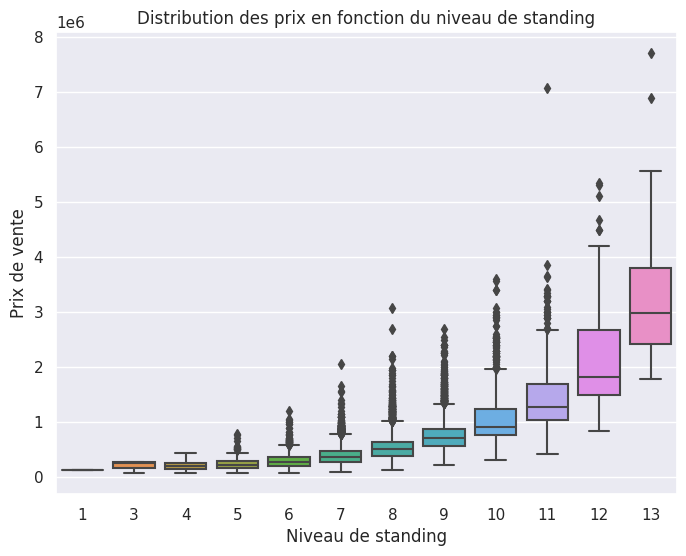

In [ ]:
fig5 = sns.boxplot(data = df, x='grade', y='price')
plt.title('Distribution des prix en fonction du niveau de standing')
plt.xlabel('Niveau de standing')
plt.ylabel('Prix de vente')
plt.show()

### Des prix par nombre de chambre 

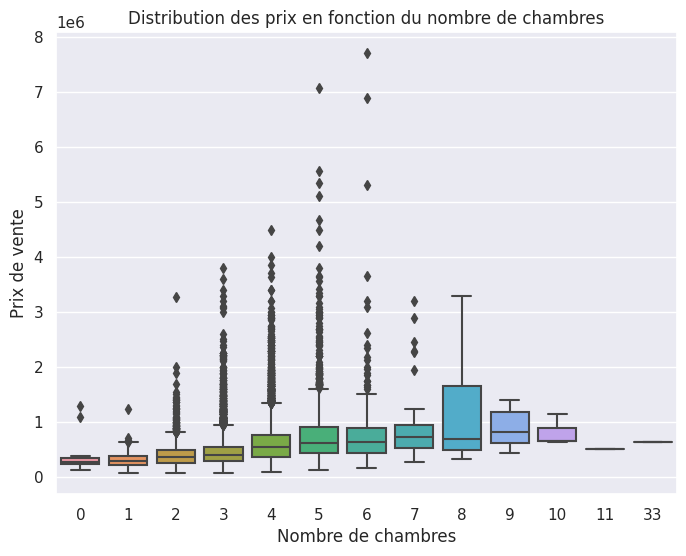

In [ ]:
fig7 = sns.boxplot(data = df, x='bedrooms', y='price')
plt.title('Distribution des prix en fonction du nombre de chambres')
plt.xlabel('Nombre de chambres')
plt.ylabel('Prix de vente')
plt.show()

## Evolution du prix de vente par année d'anciennetée des maison

In [ ]:
fig13 = px.histogram(df, x= "yr_built", y="price", title ="Prix de vente en fonction de lannée de construction")
fig13.update_xaxes(title = 'Année de construction')
fig13.update_yaxes(title = 'Prix de vente')
fig13.show()
#Ce sont les maisons de 2006 à 2007 qui représnete la plus grosse somme de ventes

## Evolution du prix de vente des maisons dans le temps

In [ ]:
fig14 = px.histogram(df, x= "date", y="price", title ="Prix de vente")
fig14.update_xaxes(title = 'Date')
fig14.update_yaxes(title = 'Prix de vente de mai 2014 à mai 2015')
fig14.show()

# REGRESSION LINEAIRE & PREDICTION

## Spliter notre DF en deux

In [ ]:
# CREER UN DF sans les valeurs nulles de la colonne price
df_clean = df.dropna(subset=["price"])

In [ ]:
# CREER UN DF avec uniquement les valeurs nulles de la colonne price
df_nan = df[df['price'].isna()]
df_nan 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_long,mean_m2,YEAR,MONTH
21609,6600060120,2015-02-23,NaN,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,"47.5107, -122.362",NaN,2015,2
21610,1523300141,2014-06-23,NaN,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,"47.5944, -122.299",NaN,2014,6
21611,291310100,2015-01-16,NaN,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,"47.5345, -122.069",NaN,2015,1
21612,1523300157,2014-10-15,NaN,2,0.75,1020,1076,2.0,0,0,...,0,98144,47.5941,-122.299,1020,1357,"47.5941, -122.299",NaN,2014,10


## Trouver le modèle de regression avec le meilleur coefficient de corrélation linéaire R2 dans df_clean 


In [ ]:
# import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Définir les variables prédictives (X) et la variable cible (y)
X_clean = df_clean[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'waterfront', 'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',  'zipcode', 'lat', 'long', 
            'sqft_living15', 'sqft_lot15']]
       													
y_clean = df_clean['price']

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, random_state=42, train_size = 0.75)

# Entraînement du modèle uniquement sur le dataset d'entraînement
modelLR = LinearRegression().fit(X_train, y_train)

# Calcul du score R2 sur l'ensemble de test et sur l'ensemble d'entraînement
print("\nScore for the Train dataset :", modelLR.score(X_train, y_train))
print("Score for the Test dataset :", modelLR.score(X_test, y_test))


Score for the Train dataset : 0.7012834392036321
Score for the Test dataset : 0.6945757530852783


ENJEUX : Trouver le meilleur mix entre : le meilleur score & la plus petite distance entre le score d'entrainement et le score de test.  
Ici cela semble correct!
Plus on positionne de variables meilleure est la prévision. 


## Trouver la variable la plus probante dans df_clean (option)

### code

In [ ]:
data = []
  
liste_col = [['bathrooms'],
             ['bedrooms'],
             ['sqft_living'],
             ['condition'],
             ['grade'],
             ['sqft_above'],
             ['sqft_basement'],
             ['yr_built'],
             ['yr_renovated'],
             ['lat'],
             ['sqft_living15']]
             
for col in liste_col:
  X = df_clean[col]
  y = df_clean['price']  

  # on split en 2 datasets : entraînement et test
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
    
  # Entraînement du modèle uniquement sur le dataset d'entraînement.
  newmodel = LinearRegression().fit(X_train, y_train)
  print("Avec la colonne : '{}', nous obtenons un score R2 :".format(', '.join(col)))

  # Affichage pour comparaison des 2 scores :
  print("- pour le dataset d'Entraînement :", newmodel.score(X_train, y_train))
  print("- pour le dataset de Test        :", newmodel.score(X_test, y_test))
  print('')

  data += [['-'.join(col), newmodel.score(X_train, y_train),'Train']]
  data += [['-'.join(col), newmodel.score(X_test, y_test), 'Test']]

print("Longueur du dataset initial :", len(X))
print("Longueur du dataset d'entraînement :", len(X_train))
print("Longueur du dataset de test    :", len(X_test))
print('')
print(data)

Avec la colonne : 'bathrooms', nous obtenons un score R2 :
- pour le dataset d'Entraînement : 0.27428242341010156
- pour le dataset de Test        : 0.2796141991144012

Avec la colonne : 'bedrooms', nous obtenons un score R2 :
- pour le dataset d'Entraînement : 0.10023833671472127
- pour le dataset de Test        : 0.08055805462554833

Avec la colonne : 'sqft_living', nous obtenons un score R2 :
- pour le dataset d'Entraînement : 0.4916261193762217
- pour le dataset de Test        : 0.49594417293256443

Avec la colonne : 'condition', nous obtenons un score R2 :
- pour le dataset d'Entraînement : 0.0011462362242855573
- pour le dataset de Test        : 0.001749960712513765

Avec la colonne : 'grade', nous obtenons un score R2 :
- pour le dataset d'Entraînement : 0.45224907585795693
- pour le dataset de Test        : 0.4271453567865735

Avec la colonne : 'sqft_above', nous obtenons un score R2 :
- pour le dataset d'Entraînement : 0.36453413485470054
- pour le dataset de Test        : 0.3

In [ ]:
# Créer un nouveau DataFrame ou on charge uniquement les variables étudiées, les R2 et la mention Train ou test
df_reg = pd.DataFrame(data, columns=['Variables', 'R2', 'Train_Test'])

### visualisation

In [ ]:
# Afficher visuellement les éléments 
fig6 = px.bar(df_reg, x="Variables", y="R2",
             color = 'Train_Test',
             barmode="group",
             width = 1300, height = 800)
fig6.update_layout(title = "Coefficient de corrélation par variable")
fig6.update_xaxes(title ='variables')
fig6.update_yaxes(title ='coefficient de corrélation')
fig6.show()

On va se concentrer sur les 5 plus grosses corrélations avec les variables suivantes :   
1) sqft_living,  
2) grade,  
3) sqft_above,   
4) sqft_living15,  
5) bathrooms,  


 



# FINALISATION DU DATAFRAME sans valeurs nulles

## Remplacer les valeurs nulles du df_nan par les données prédites 


In [ ]:
# Définir les variables prédictives (X) et la variable cible (y) => Selectionner les mêmes colonnes que df_clean
X_nan = df_nan[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'waterfront', 'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',  'zipcode', 'lat', 'long', 
            'sqft_living15', 'sqft_lot15']]

y_nan = df_nan['price']

# On se sert du modele réalisé au dessus sur df_clean et on prédit les données sur df_nan pour remplacer les données nulles de la colonne PRICE
df_nan['price'] = modelLR.predict(X_nan) 

<ipython-input-33-4456163cad18>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# affichage du prix prédit
df_nan

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_long,mean_m2,YEAR,MONTH
21609,6600060120,2015-02-23,436408.092134,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,"47.5107, -122.362",NaN,2015,2
21610,1523300141,2014-06-23,150595.104945,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,"47.5944, -122.299",NaN,2014,6
21611,291310100,2015-01-16,388749.186971,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,"47.5345, -122.069",NaN,2015,1
21612,1523300157,2014-10-15,153266.608838,2,0.75,1020,1076,2.0,0,0,...,0,98144,47.5941,-122.299,1020,1357,"47.5941, -122.299",NaN,2014,10


In [ ]:
for index, row in df_nan.iterrows():
    print("Le prix estimé pour la maison avec l'id : {},\n situé à {}° Nord, {}° Ouest, avec {} chambres et une surface habitable de {} pieds carrés,\n\t est de {} dollars.".format(row.id, row.lat, abs(row.long), row.bedrooms, row.sqft_living, round(row.price)))
    print('')

Le prix estimé pour la maison avec l'id : 6600060120,
 situé à 47.5107° Nord, 122.362° Ouest, avec 4 chambres et une surface habitable de 2310 pieds carrés,
	 est de 436408 dollars.

Le prix estimé pour la maison avec l'id : 1523300141,
 situé à 47.5944° Nord, 122.299° Ouest, avec 2 chambres et une surface habitable de 1020 pieds carrés,
	 est de 150595 dollars.

Le prix estimé pour la maison avec l'id : 291310100,
 situé à 47.5345° Nord, 122.069° Ouest, avec 3 chambres et une surface habitable de 1600 pieds carrés,
	 est de 388749 dollars.

Le prix estimé pour la maison avec l'id : 1523300157,
 situé à 47.5941° Nord, 122.299° Ouest, avec 2 chambres et une surface habitable de 1020 pieds carrés,
	 est de 153267 dollars.



## Concatener nos 2 DF 


In [ ]:
# création de la colonne 'FLAG' afin d'identifier la ou il y a eu une prédiction
df_nan['FLAG'] = 'predicted'
df_clean['FLAG'] = 'real'

# concatener les 2 df 
df_complete = pd.concat([df_nan, df_clean])   

<ipython-input-36-b4923067c6f9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-b4923067c6f9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_complete.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,lat_long,mean_m2,YEAR,MONTH,FLAG
21609,6600060120,2015-02-23,436408.092134,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,"47.5107, -122.362",NaN,2015,2,predicted
21610,1523300141,2014-06-23,150595.104945,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,"47.5944, -122.299",NaN,2014,6,predicted
21611,291310100,2015-01-16,388749.186971,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,"47.5345, -122.069",NaN,2015,1,predicted
21612,1523300157,2014-10-15,153266.608838,2,0.75,1020,1076,2.0,0,0,...,98144,47.5941,-122.299,1020,1357,"47.5941, -122.299",NaN,2014,10,predicted
0,7129300520,2014-10-13,221900.000000,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,"47.5112, -122.257",2024.163347,2014,10,real


## Visualisation après prédiction

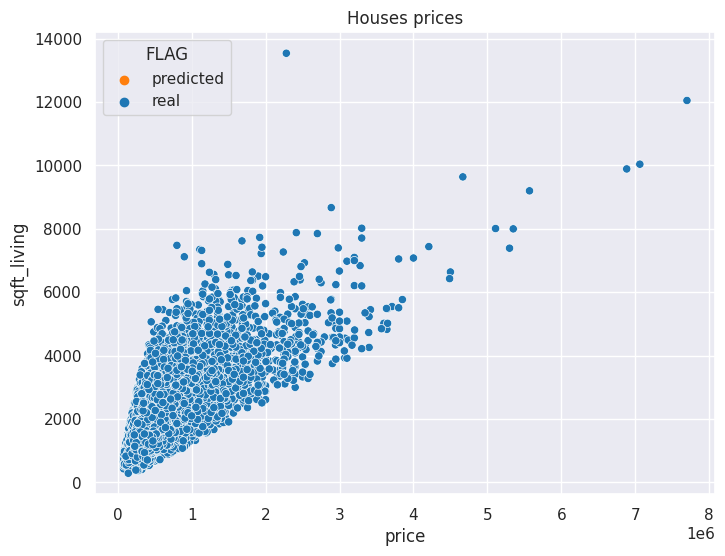

In [ ]:
sns.scatterplot(data = df_complete, x ='price', y = 'sqft_living', hue = 'FLAG', palette = ['tab:orange', 'tab:blue'])
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title("Houses prices")
plt.show();


# DATAPANE

### Installation

In [ ]:
!pip3 install -U datapane

In [ ]:
import datapane as dp

### Visualisation

In [ ]:
view = dp.View( 
        dp.Text("# Présentation"),
        dp.Select (      
                    dp.Plot(fig13, label = "Prix de vente vs année construction"),
                    dp.Plot(fig14, label = "Prix de vente 2014-2015"),
                    dp.Plot(fig4, label = "Géolocalisation prix de vente"),
                    dp.Plot(fig2, label = "Heatmap"),
                    dp.Plot(fig6, label = "R2 par variable"),
                    dp.Plot(fig3, label = "Prix vs surface"),
                    dp.Plot(fig5, label = "Prix vs standing"),
                    dp.DataTable(df_complete, label="df")  
                  )
              )
view

### Exportation au format HTML

In [ ]:
dp.save_report(view, "Regression House sales.html", open=True)

App saved to ./Regression House sales.html

file:///Users/camillemagnette/Downloads/Regression%20House%20sales.html

### Publier le rapport sur le cloud datapane

In [ ]:
dp.upload_report(view, name = "Regression House sales", publicly_visible=True)

file:///Users/camillemagnette/Downloads/Regression%20House%20sales%20(2).html

